<p><font size="6" color='grey'> <b>
Machine Learning
</b></font> </br></p>
<p><font size="5" color='grey'> <b>
Unsupervised Learning - Apriori - Waldbrandrisiko
</b></font> </br></p>

---


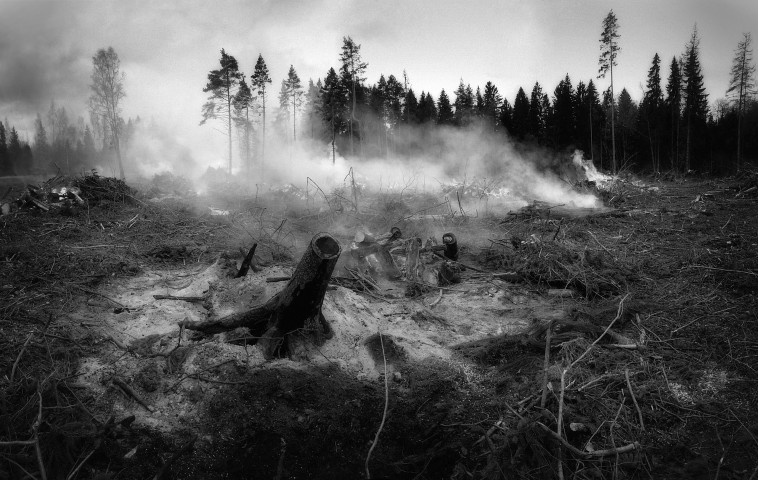

Bild von <a href="https://pixabay.com/de/users/ojkumena-5540942/?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=2370996">ojkumena</a> auf <a href="https://pixabay.com/de//?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=2370996">Pixabay</a>

# **0 | Install & Import**
---

In [ ]:
# Install

In [ ]:
# Import
from pandas import read_csv, DataFrame, concat
import numpy as np

# import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
# Warnungen ausstellen
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", module="ipykernel.ipkernel")
warnings.filterwarnings("ignore", category=DeprecationWarning)

# **1 | Understand**
---


<p><font color='black' size="5">
Anwendungsfall
</font></p>

In diesem Anwendungsfall wird der Apriori-Algorithmus eingesetzt, um häufig auftretende Kombinationen von Umweltbedingungen zu identifizieren, die mit dem Risiko von Waldbränden zusammenhängen. Der Datensatz enthält beobachtete Umweltbedingungen (z.B. Temperatur, Luftfeuchtigkeit, Wind, Vegetationszustand) an verschiedenen Tagen oder Zeiträumen, zusammen mit der Information, ob in diesem Zeitraum ein Waldbrand stattgefunden hat.

Das Ziel ist es, Assoziationsregeln zu generieren, die zeigen, welche Kombinationen von Umweltbedingungen häufig zusammen auftreten und wie stark sie mit dem Risiko eines Waldbrandes verbunden sind. Beispielsweise könnte der Algorithmus feststellen, dass die Kombination aus 'Hoher Temperatur', 'Niedriger Luftfeuchtigkeit', 'Starkem Wind' und 'Trockener Vegetation' besonders häufig an Tagen mit Waldbränden auftritt.

Diese Analyse kann dazu beitragen, typische Risikokombinationen für Waldbrände zu erkennen, potenzielle Frühwarnsignale zu identifizieren und als Grundlage für die Entwicklung von Risikobewertungsmodellen oder Präventionsstrategien zu dienen.

In [ ]:
# Beispiel-Daten, die Umweltbedingungen an verschiedenen Tagen/Perioden darstellen
# Jede innere Liste repräsentiert einen Tag/Zeitraum und die beobachteten Bedingungen
# Hinweis: Dies ist ein hypothetischer Datensatz zur Illustration.
data = [
    ['HoheTemperatur', 'NiedrigeLuftfeuchtigkeit', 'StarkerWind', 'TrockeneVegetation', 'Waldbrand'],
    ['HoheTemperatur', 'NiedrigeLuftfeuchtigkeit', 'ModeraterWind', 'TrockeneVegetation', 'KeinWaldbrand'],
    ['MittlereTemperatur', 'MittlereLuftfeuchtigkeit', 'FeuchteVegetation', 'KeinWaldbrand'],
    ['HoheTemperatur', 'NiedrigeLuftfeuchtigkeit', 'StarkerWind', 'TrockeneVegetation', 'Waldbrand'],
    ['HoheTemperatur', 'NiedrigeLuftfeuchtigkeit', 'ModeraterWind', 'TrockeneVegetation', 'KeinWaldbrand'],
    ['MittlereTemperatur', 'NiedrigeLuftfeuchtigkeit', 'StarkerWind', 'TrockeneVegetation', 'KeinWaldbrand'],
    ['HoheTemperatur', 'NiedrigeLuftfeuchtigkeit', 'StarkerWind', 'TrockeneVegetation', 'Waldbrand'],
    ['MittlereTemperatur', 'MittlereLuftfeuchtigkeit', 'ModeraterWind', 'FeuchteVegetation', 'KeinWaldbrand'],
    ['HoheTemperatur', 'NiedrigeLuftfeuchtigkeit', 'StarkerWind', 'TrockeneVegetation', 'Waldbrand'],
    ['HoheTemperatur', 'NiedrigeLuftfeuchtigkeit', 'ModeraterWind', 'TrockeneVegetation', 'KeinWaldbrand'],
    ['HoheTemperatur', 'NiedrigeLuftfeuchtigkeit', 'StarkerWind', 'TrockeneVegetation', 'Waldbrand'],
    ['MittlereTemperatur', 'NiedrigeLuftfeuchtigkeit', 'StarkerWind', 'TrockeneVegetation', 'KeinWaldbrand'],
    ['HoheTemperatur', 'NiedrigeLuftfeuchtigkeit', 'StarkerWind', 'TrockeneVegetation', 'Waldbrand'],
    ['MittlereTemperatur', 'MittlereLuftfeuchtigkeit', 'ModeraterWind', 'FeuchteVegetation', 'KeinWaldbrand'],
    ['HoheTemperatur', 'NiedrigeLuftfeuchtigkeit', 'StarkerWind', 'TrockeneVegetation', 'Waldbrand']
]

# **2 | Prepare**

---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Nicht benötigte Features löschen</br>
✅ Datentyp ermitteln/ändern</br>
✅ Duplikate ermitteln/löschen</br>
✅ Missing Values behandeln</br>
✅ Ausreißer behandeln</br>
✅ Kategorischer Features codieren</br>
✅ Numerischer Features skalieren</br>
✅ Feature-Engineering (neue Features schaffen)</br>
✅ Dimensionalität reduzieren</br>
✅ Resampling (Over-/Undersampling)</br>
✅ Pipeline erstellen/konfigurieren</br>
✅ Train-Test-Split durchführen</br>

<p><font color='black' size="5">
Erstelle eine True/False DataFrame mit den Items als Spalte
</font></p>

In [ ]:
encoder = TransactionEncoder()
data_array = encoder.fit(data).transform(data) # Erstellt eine Python-Liste mit True/False Angaben je Item
df = DataFrame(data_array, columns=encoder.columns_)
df

# **3 | Modeling**
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Modellauswahl treffen</br>
✅ Pipeline erweitern/konfigurieren</br>
✅ Training durchführen</br>
✅ Hyperparameter Tuning</br>
✅ Cross-Valdiation</br>
✅ Bootstrapping</br>
✅ Regularization</br>

<p><font color='black' size="5">
Apriori
</font></p>

<p><font size="3">
Der Apriori-Algorithmus ist der beliebteste Algorithmus für das Mining von Assoziationsregeln. Er findet die häufigsten Kombinationen in einem Datenbestand.
<br>



# **4 | Evaluate**
---


<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Prognose (Train, Test) erstellen</br>
✅ Modellgüte prüfen</br>
✅ Residuenanalyse erstellen</br>
✅ Feature Importance/Selektion prüfen</br>
✅ Robustheitstest erstellen</br>
✅ Modellinterpretation erstellen</br>
✅ Sensitivitätsanalyse erstellen</br>
✅ Kommunikation (Key Takeaways)</br>

<p><font color='black' size="5">
Parmeter-Set
</font></p>

In [ ]:
# Übergreifende Parameter
min_support = 0.30
min_threshold = 0.70

# Spaltenauswahl
auszug = [
    "antecedents",
    "consequents",
    "antecedent support",
    "consequent support",
    "support",
    "confidence",
    "lift",
]
auszug_num = [
    "antecedent support",
    "consequent support",
    "support",
    "confidence",
    "lift",
]
auszug_confidence = [
    "antecedents",
    "consequents",
    "antecedent support",
    "consequent support",
    "support",
    "confidence",
]
auszug_lift = ["antecedents", "consequents", "lift"]

<p><font color='black' size="5">
Berechnung
</font></p>

In [ ]:
# Berechnung Frequenzen
frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
frequent_itemsets.support = frequent_itemsets.support.round(2) * 100  # Umrechnung in %
frequent_itemsets = frequent_itemsets[["itemsets", "support"]]  # Ändern Reihenfolge

In [ ]:
# Berechnung Regeln
associationRulesSet = association_rules(
    frequent_itemsets, num_itemsets=1, metric="confidence", min_threshold=min_threshold
)
associationRulesSet = associationRulesSet[auszug]
associationRulesSet[["confidence", "lift"]] = (
    associationRulesSet[["confidence", "lift"]] * 100
)
associationRulesSet[auszug_num] = associationRulesSet[auszug_num].round(2)

**Support (Häufigkeit)**   

Der Support sagt uns, wie häufig eine bestimmte Kombination von Umweltbedingungen in beobachteten Zeiträumen vorkommt. Er wird als Prozentsatz aller beobachteten Zeiträume angegeben.

`WENN man alle beobachteten Zeiträume betrachtet, DANN ist in X% der Zeiträume Bedingung A enthalten`

Beispiel: Wenn in 15 beobachteten Tagen 7-mal sowohl 'Hohe Temperatur' als auch 'Niedrige Luftfeuchtigkeit' gemessen wurden, dann ist der Support für diese Kombination (7 / 15) * 100% ≈ 46,7%.

In [ ]:
frequent_itemsets.head(5)

In [ ]:
frequent_itemsets.tail(5)

**Confidence (Verlässlichkeit)**

Die Confidence zeigt, wie verlässlich eine Regel ist. Sie gibt an: Wenn Bedingung A (antecedents) in einem beobachteten Zeitraum vorhanden ist, wie wahrscheinlich ist es dann, dass auch Bedingung B (consequents) ebenfalls vorhanden ist?

`WENN Bedingung A in einem beobachteten Zeitraum enthalten ist, DANN ist mit X% Wahrscheinlichkeit auch Bedingung B in diesem Zeitraum enthalten`

Beispiel: Wenn von 15 beobachteten Tagen, an denen 'Hohe Temperatur' gemessen wurde, 12 auch 'Niedrige Luftfeuchtigkeit' gemessen wurde, dann ist die Confidence (12 / 15) * 100% = 80%. Die Regel "Wenn 'Hohe Temperatur', dann 'Niedrige Luftfeuchtigkeit'" hat also eine hohe Verlässlichkeit in diesem Datensatz.

In [ ]:
associationRulesSet[auszug_confidence].head(5)

In [ ]:
associationRulesSet[auszug_confidence].tail(5)

In [ ]:
# Beispiel: Regeln basierend auf dem Konsequens (rechte Seite) filtern - Bedingungen identifizieren, die oft mit Waldbrand verbunden sind
rules_mit_waldbrand = associationRulesSet[associationRulesSet['consequents'].apply(lambda x: 'Waldbrand' in x)]

print("Assoziationsregeln mit 'Waldbrand' im Konsequens:")
rules_mit_waldbrand[auszug_confidence].head(5)

In [ ]:
# Beispiel: Regeln basierend auf dem Antezedens (linke Seite) filtern - Bedingungskombinationen identifizieren, die oft zusammen auftreten
rules_mit_risiko_bedingungen = associationRulesSet[associationRulesSet['antecedents'].apply(lambda x: 'HoheTemperatur' in x and 'NiedrigeLuftfeuchtigkeit' in x and 'StarkerWind' in x and 'TrockeneVegetation' in x)]

print("Assoziationsregeln mit 'HoheTemperatur', 'NiedrigeLuftfeuchtigkeit', 'StarkerWind' und 'TrockeneVegetation' im Antezedens:")
rules_mit_risiko_bedingungen[auszug_confidence].head(5)

**Lift (Zusammenhang)**

Der Lift zeigt, ob zwei Bedingungen wirklich zusammenhängen oder ob sie nur zufällig zusammen auftreten.

+ Lift = 1 → keine Beziehung, Bedingungen treten unabhängig voneinander auf

+ Lift > 1 → eine positive Beziehung/Regel, Bedingungen treten häufiger zusammen auf

+ Lift < 1 → negative Beziehung zwischen den Bedingungen, gegenseitig ausschließende oder substituierende Bedingungen

`WENN der Wert größer als 1 ist, DANN treten die Bedingungen A und B häufiger zusammen auf`

Beispiel: Ein Lift von 2,5 zwischen 'Hoher Temperatur' und 'Niedrige Luftfeuchtigkeit' bedeutet, dass diese Kombination 2,5-mal häufiger in beobachteten Zeiträumen vorkommt als es bei zufälligem Auftreten zu erwarten wäre. Die Bedingungen haben also eine echte Verbindung zueinander in diesem Datensatz.

In [ ]:
associationRulesSet[auszug_lift].head(5)

In [ ]:
associationRulesSet[auszug_lift].tail(5)

# **5 | Deploy**
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Modellexport und -speicherung</br>
✅ Abhängigkeiten und Umgebung</br>
✅ Sicherheit und Datenschutz</br>
✅ In die Produktion integrieren</br>
✅ Tests und Validierung</br>
✅ Dokumentation & Wartung</br>